In [2]:
import pandas as pd
from src.dataset.pandas_dataset import BasePandasDataset as bpd
from src.dataset.pandas_dataset import RandomPandasDataset as rpd

from src.project_system.condition import condition as cd

from src.plots.eval_plots import plot_mean_abs_error
from src.plots import eval_plots

import shap

In [3]:
data = pd.read_csv("data/processed/starter_data.csv")


target = 'FM_AVERAGE'
features_dict = {
    'aff': ['AFFECTED'],
    'unaff': ['UNAFFECTED'],
    'asym': ['ASYMMETRY'],
    'tss': ['TSS'],
}

pandas_dataset = bpd(dataframe=data, target=target, sample_id_col='SUB_ID', feature_filter=features_dict)

test_run = cd.TorchRun(dataset=pandas_dataset, dry_run=False, project_name="real_vs_random_inputs", experiment_name="base_comparison", run_name="real_inputs")
report, shap_explanations =  test_run.train(epochs=40)

Seed set to 42


Running training loop.
Running Leave-One-Out Cross Validation with 24 folds.
Working on fold 0 train ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] val ids: [0] - sample_id 0    NF01
Name: SUB_ID, dtype: object
Fold 0 Train Epoch: 1 [0/24 (0%)]	Loss: 51.901382
Fold 0 Train Epoch: 1 [3/24 (12%)]	Loss: 51.883129
Fold 0 Train Epoch: 1 [9/24 (38%)]	Loss: 38.593605
Fold 0 Train Epoch: 1 [15/24 (62%)]	Loss: 51.434258
Fold 0 Train Epoch: 1 [14/24 (88%)]	Loss: 39.286385

For fold: 0 Validation set: Average loss: 1.4700, MAE: (35)

Working on fold 1 train ids: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] val ids: [1] - sample_id 1    NF02
Name: SUB_ID, dtype: object
Fold 1 Train Epoch: 1 [0/24 (0%)]	Loss: 47.743782
Fold 1 Train Epoch: 1 [3/24 (12%)]	Loss: 42.098274
Fold 1 Train Epoch: 1 [9/24 (38%)]	Loss: 35.559734
Fold 1 Train Epoch: 1 [15/24 (62%)]	Loss: 39.787300
Fold 1 Train Epoch: 1 [14/24 (88%)]	Loss: 55.030853

For fold: 1 Validation

In [4]:
report['abs_error'].mean()

9.4491

In [5]:
random_dataset = rpd(pandas_dataset)
random_run = cd.TorchRun(dataset = random_dataset, dry_run=False, project_name='real_vs_random_inputs', experiment_name='base_comparison', run_name='random_inputs')
rand_report, rand_shap_explanations =random_run.train(epochs=40)

Seed set to 42


Running training loop.
Running Leave-One-Out Cross Validation with 24 folds.
Working on fold 0 train ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] val ids: [0] - sample_id 0    NF01
Name: SUB_ID, dtype: object
Fold 0 Train Epoch: 1 [0/24 (0%)]	Loss: 52.225403
Fold 0 Train Epoch: 1 [3/24 (12%)]	Loss: 52.299316
Fold 0 Train Epoch: 1 [9/24 (38%)]	Loss: 39.096291
Fold 0 Train Epoch: 1 [15/24 (62%)]	Loss: 52.081253
Fold 0 Train Epoch: 1 [14/24 (88%)]	Loss: 39.868279

For fold: 0 Validation set: Average loss: 1.4995, MAE: (36)

Working on fold 1 train ids: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] val ids: [1] - sample_id 1    NF02
Name: SUB_ID, dtype: object
Fold 1 Train Epoch: 1 [0/24 (0%)]	Loss: 47.870514
Fold 1 Train Epoch: 1 [3/24 (12%)]	Loss: 42.335949
Fold 1 Train Epoch: 1 [9/24 (38%)]	Loss: 35.965202
Fold 1 Train Epoch: 1 [15/24 (62%)]	Loss: 40.362480
Fold 1 Train Epoch: 1 [14/24 (88%)]	Loss: 55.764877

For fold: 1 Validation

In [6]:
rand_report['abs_error'].mean()

10.958870833333334

In [7]:
df_dict = {}
df_dict['real'] = report
df_dict['random'] = rand_report

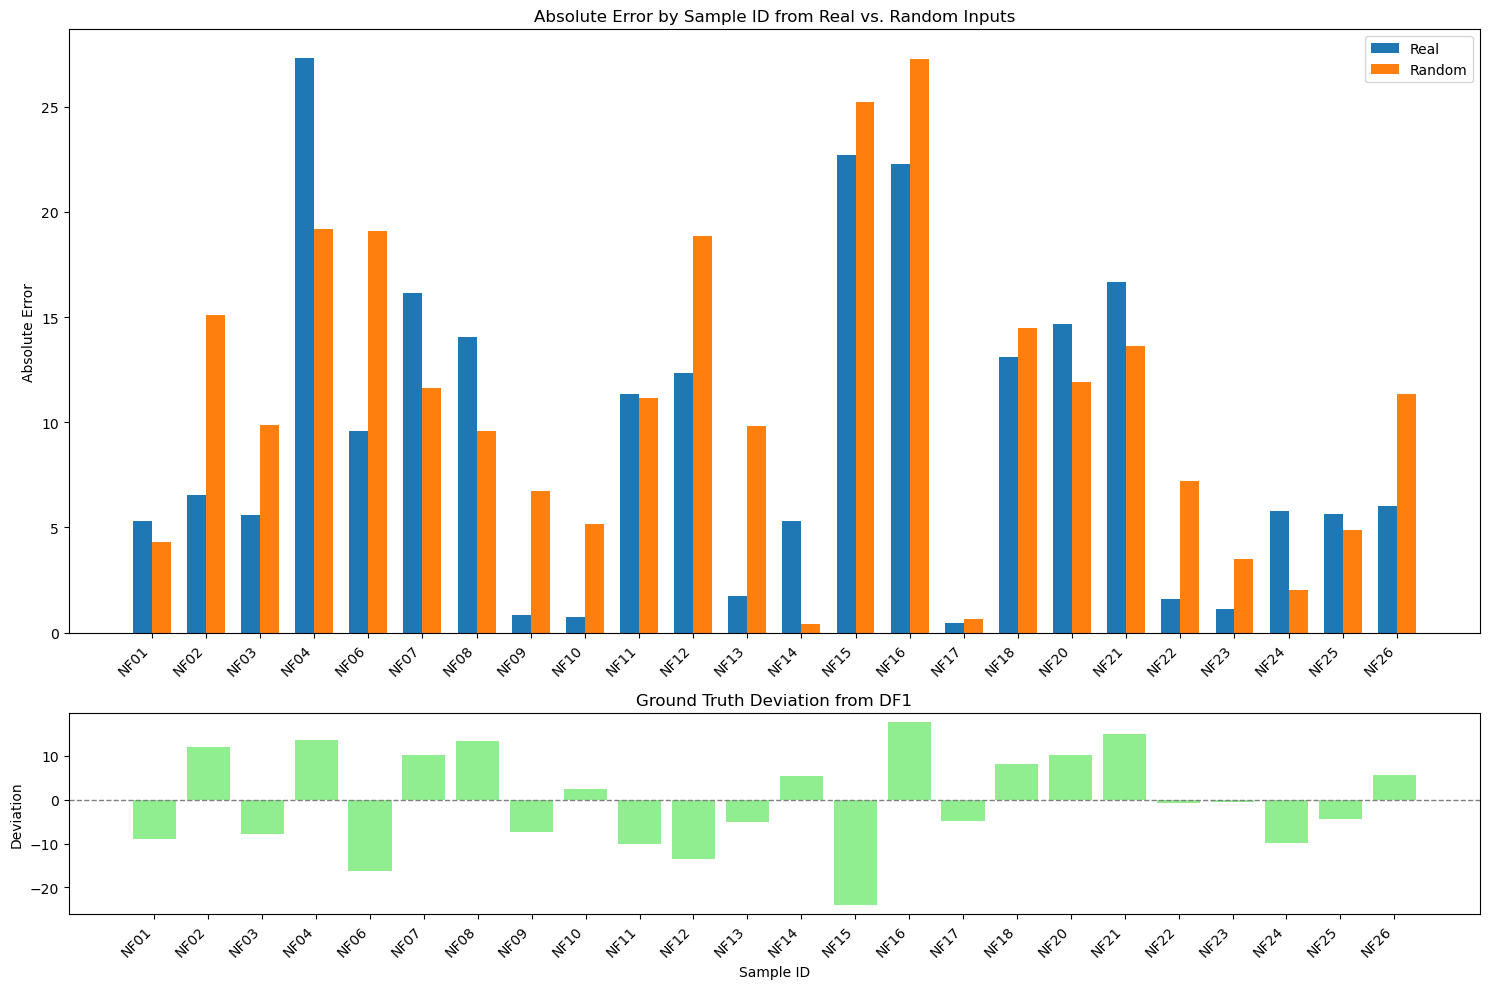

In [8]:

eval_plots.compare_conditions(report, rand_report, df_label1='Real', df_label2='Random', title='Absolute Error by Sample ID from Real vs. Random Inputs')


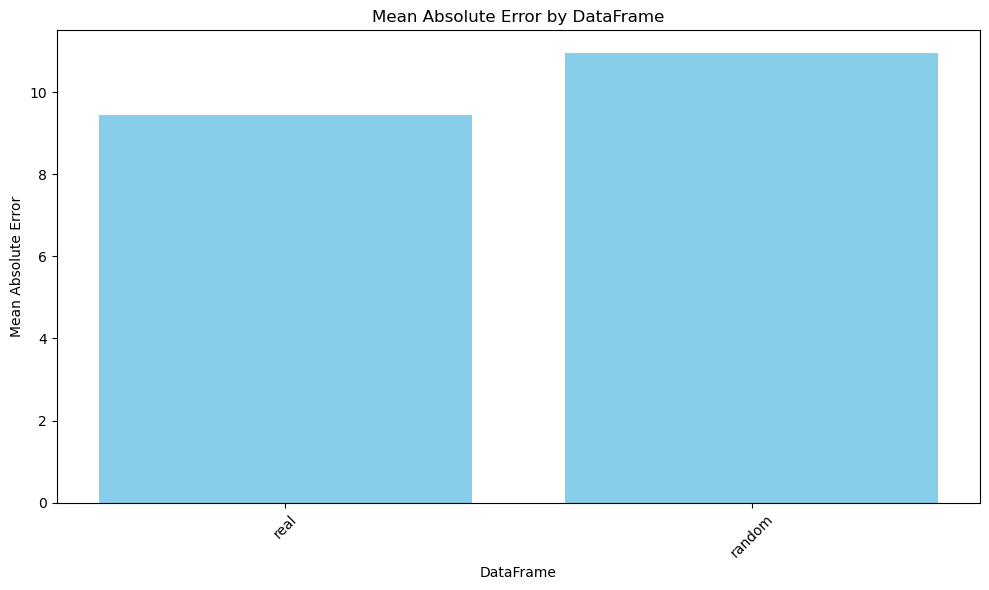

In [9]:
plot_mean_abs_error(df_dict)

### Launch tensorboard - terminal command:
tensorboard --logdir=projects\real_vs_random_inputs\base_comparison\real_inputs <br>
tensorboard --logdir=projects\real_vs_random_inputs\base_comparison\random_inputs

### TODO: 
create summary for a single condition - collate relevant metrics, training data etc <br>
create plotting functions <br>
- plot performance metrics for a single condition first <br>
- plot comparisons between conditions - find matching column names and make a list - options for plotting <br>